# A basic approach to betting Baseball <img src="y.jpg" alt="Description" style="float: right; width: 300px;">

Here is a basic introduction on how I use past MLB moneyline odds to get insight on betting strategies. I am working on getting both weather and pitching data together, but for now, I only use data from the teams recent win-loss performance. The dataset contains regular seasons 2017-2019 and 2021-present. The odds source is Yahoo Sports.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('data.csv')

Let's start with a betting strategy I have bet on in the past.

- A **home team** that has **lost two** or more straight games facing a team that has **won two** or more in a row, that are facing off in the **third game** of a series. We look only at games of this type that fall on a saturday or sunday.

In [28]:
A = df['loss_streak']>= 2
B = df['win_streak_opp'] >= 2
C = df['is_home']
D = df['series_game_no'] == 3
E = df['weekday'].isin([5,6])
FILTER = A&B&C&D&E
DATA = df.loc[FILTER].groupby('season')['hundred_ml'].agg(['count','sum','mean'])
DATA['sum'] = DATA['sum'].apply(lambda x: round(x,2))
DATA['mean'] = DATA['mean'].apply(lambda x: round(x,2))
DATA

,count,sum,mean
season,,,
2017,89,1690.71,19.00
2018,95,-153.14,-1.61
2019,80,714.74,8.93
2021,67,-1143.68,-17.07
2022,89,490.62,5.51
2023,108,1104.65,10.23
2024,82,1295.55,15.80
2025,28,433.81,15.49


The only losing seasons for this betting strategy were in **2018** and **2021**, with **2021** showing a big loss but **2024** with just as big of  profit. Let's chart the cumulative profit over time for this betting strategy:

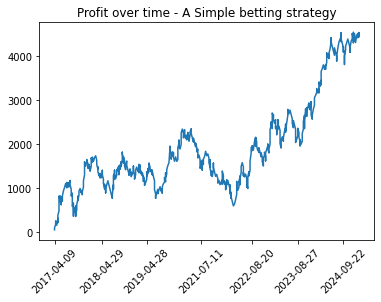

In [50]:
X = df.loc[FILTER,'date']
Y = df.loc[FILTER,'hundred_ml'].cumsum()
plt.figure()
plt.plot(X,Y)
plt.title("Profit over time - A Simple betting strategy")
ticks = plt.xticks(ticks = X.values.tolist()[::100],rotation = 45)

To re-emphasize the betting strategy:

- If **home team** has lost the first two games of a three game set, bet them to win the third game.

 Taking a step back, let's compare overall home winning percentages by year:

In [19]:
DATA2 = df[df['is_home']].groupby('season')['win'].agg(['count','mean'])
DATA2['mean'] = DATA2['mean'].apply(lambda x: round(x,3))
DATA2

,count,mean
season,,
2017,2402,0.541
2018,2392,0.529
2019,2343,0.527
2021,2179,0.540
2022,2428,0.533
2023,2430,0.521
2024,2428,0.522
2025,1015,0.549


The home team win rate seems to be around **53%**. If we compare by **series game number**, we see that the home team performs slightly better as the series goes on. The home teams wins 2 more games out of every 100 in series game fourth game of a set rather than the first game of a set. 

In [20]:
DATA3 = df[df['is_home']].groupby('series_game_no')['win'].agg(['count','mean']).head(4)
DATA3['mean'] = DATA3['mean'].apply(lambda x: round(x,3))
DATA3

,count,mean
series_game_no,,
1,5735,0.523
2,5672,0.531
3,5079,0.539
4,1110,0.543


This is my basic approach to betting; slice data from past seasons based on a given betting strategy, and analyze the %ROI results. 

This approach is *arguably dumb*. Most investors in any speculation market will tell you that the past does not predict the future. Or, if you believe in the efficient market hypothesis, any supposed advantage a certain team will have over another will already be reflected in the current moneyline price before the game starts.